In [1]:
import pandas as pd
import numpy as np
import sklearn
import re  
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
MyDataSet=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\oil_prediction_final.csv')
MyDataSet.head()

,Unnamed: 0,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return
0,0,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42,-0.007825
1,1,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11,-0.036917
2,2,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45,0.005647
3,3,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47,0.000000
4,4,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60,-0.003238


In [3]:
MyDataSet=MyDataSet.drop(['Unnamed: 0'],axis=1)

In [4]:
confidence_level = 0.05
MyDataSet['VaR_5_percent'] = MyDataSet['oil_return'].rolling(window=10).quantile(confidence_level)

In [5]:
MyDataSet['VaR_5_percent_lag1'] = MyDataSet['VaR_5_percent'].shift(1)
MyDataSet['VaR_5_percent_lag2'] = MyDataSet['VaR_5_percent'].shift(2)
MyDataSet['VaR_5_percent_lag3'] = MyDataSet['VaR_5_percent'].shift(3)

In [6]:
MyDataSet.dropna(inplace=True)

In [7]:
MyDataSet.head()

,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return,VaR_5_percent,VaR_5_percent_lag1,VaR_5_percent_lag2,VaR_5_percent_lag3
12,2000-01-21,29.71,75.088715,69.099312,81.650505,81.45,-0.002912,1441.36,0.001346,-0.001781,-0.001781,-0.021761,-0.023826
13,2000-01-24,29.25,90.755280,104.395302,69.660797,35.57,-0.027634,1401.53,-0.015726,-0.010106,-0.001781,-0.001781,-0.021761
14,2000-01-25,30.28,60.576313,69.925087,53.022213,5.93,0.006065,1410.03,0.034016,-0.008044,-0.010106,-0.001781,-0.001781
15,2000-01-26,27.66,74.375435,74.146500,71.360207,30.54,-0.004213,1404.09,-0.094722,-0.059174,-0.008044,-0.010106,-0.001781
16,2000-01-27,27.22,66.864273,61.103588,69.499680,46.19,-0.003938,1398.56,-0.016165,-0.059371,-0.059174,-0.008044,-0.010106


In [8]:
X = MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent'], axis= 1)
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [9]:
Y=MyDataSet['VaR_5_percent']

In [10]:
threshold = np.median(Y)

In [11]:
Y_binary = (Y> threshold).astype(int)

In [12]:
print(X.shape)
print(Y.shape)

(6001, 7)
(6001,)


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y_binary,test_size =0.3)
print(x_train.shape)
print(y_train.shape)

(4200, 7)
(4200,)


In [14]:
SVM_Model=LinearSVC(C=10)

In [15]:
SVM_Model.fit(x_train, y_train)

LinearSVC(C=10)

In [16]:
y_pred=SVM_Model.predict(x_test)

In [17]:
SVM_matrix = confusion_matrix(y_test,y_pred )

In [18]:
print(SVM_matrix)

[[833  94]
 [ 46 828]]


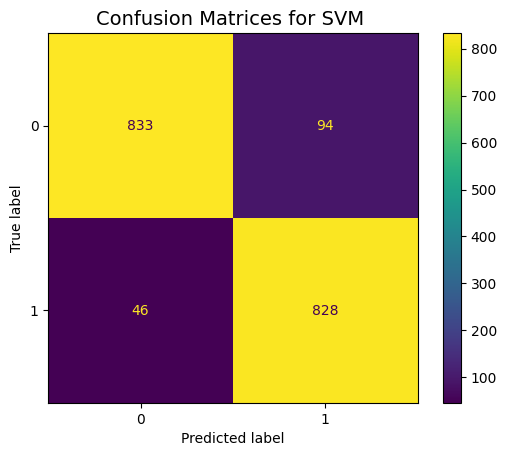

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrices for SVM ', fontsize=14)
plt.show()

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9128262076624097


kERNELS

In [18]:
## RBF
SVM_Model2=sklearn.svm.SVC(C=10, kernel='rbf', 
                           verbose=True, gamma="auto")
SVM_Model2.fit(x_train, y_train)

[LibSVM]

SVC(C=10, gamma='auto', verbose=True)

In [19]:
y_pred_rbf=SVM_Model2.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", accuracy)

Accuracy: 0.9128262076624097


In [22]:
SVM_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
print(SVM_matrix_rbf)

[[864  63]
 [ 70 804]]


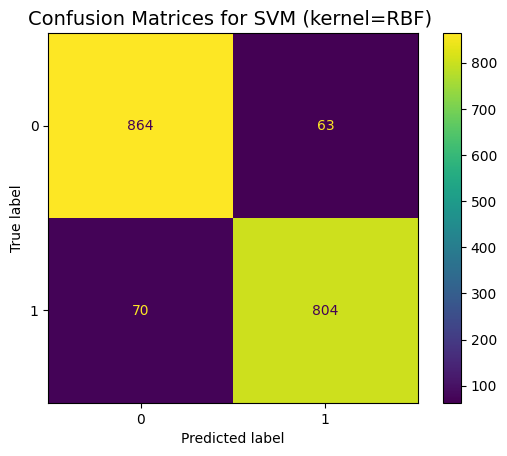

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rbf)
plt.title('Confusion Matrices for SVM (kernel=RBF) ', fontsize=14)
plt.show()

In [21]:
## POLY
SVM_Model3=sklearn.svm.SVC(C=10, kernel='poly',degree=3,
                           gamma="auto", verbose=True)
SVM_Model3.fit(x_train,y_train)

[LibSVM]

SVC(C=10, gamma='auto', kernel='poly', verbose=True)

In [22]:
y_pred_poly=SVM_Model3.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred_poly)
print("Accuracy:", accuracy)

Accuracy: 0.8656302054414214


In [26]:
SVM_matrix_poly = confusion_matrix(y_test, y_pred_poly)
print(SVM_matrix_poly)

[[848  79]
 [137 737]]


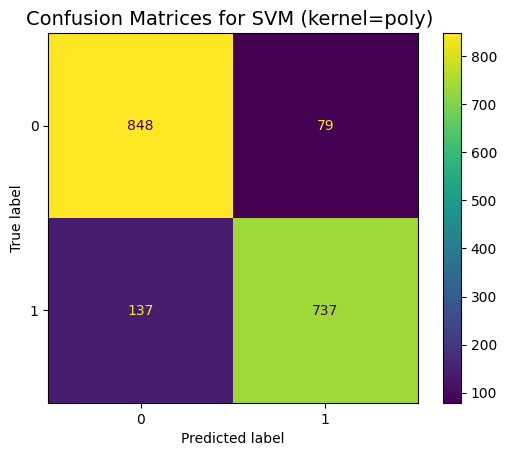

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_poly)
plt.title('Confusion Matrices for SVM (kernel=poly) ', fontsize=14)
plt.show()

In [24]:
###sigmoid
SVM_Model4=sklearn.svm.SVC(C=10, kernel='sigmoid',degree=3,
                           gamma="auto", verbose=True)
SVM_Model4.fit(x_train,y_train)

[LibSVM]

SVC(C=10, gamma='auto', kernel='sigmoid', verbose=True)

In [25]:
y_pred_sigmoid=SVM_Model4.predict(x_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred_sigmoid)
print("Accuracy:", accuracy)

Accuracy: 0.8373126041088285


In [30]:
SVM_matrix_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
print(SVM_matrix_sigmoid)

[[771 156]
 [150 724]]


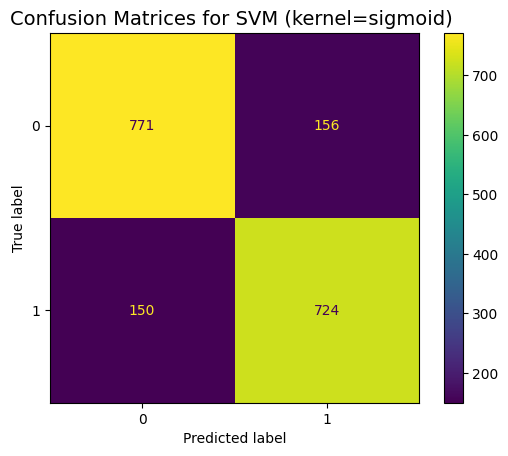

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sigmoid)
plt.title('Confusion Matrices for SVM (kernel=sigmoid) ', fontsize=14)
plt.show()

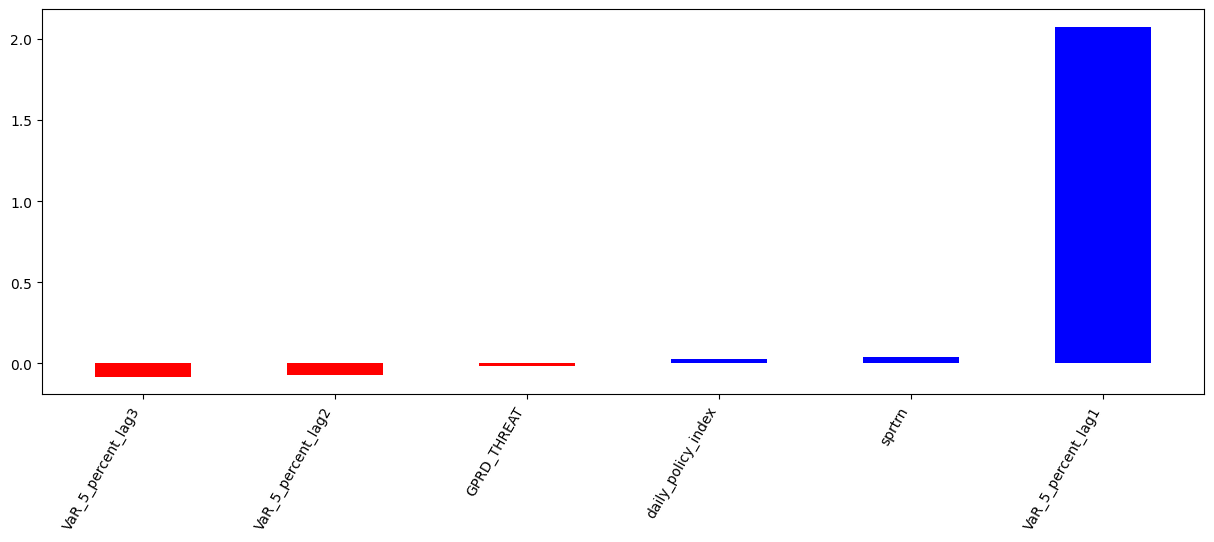

In [35]:
def plot_coefficients(MODEL=SVM_Model, COLNAMES=MyDataSet.drop(['oil_return', 'date', 'value', 'spindx', 'GPRD', 'VaR_5_percent'], axis=1).columns, top_features=3):
    ## Model if SVM MUST be SVC, RE: SVM_Model=LinearSVC(C=10)
    coef = MODEL.coef_.ravel()
    top_positive_coefficients = np.argsort(coef,axis=0)[-top_features:]
    top_negative_coefficients = np.argsort(coef,axis=0)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(  x=  np.arange(2 * top_features)  , height=coef[top_coefficients], width=.5,  color=colors)
    feature_names = np.array(COLNAMES)
    plt.xticks(np.arange(0, (2*top_features)), feature_names[top_coefficients], rotation=60, ha="right")
    plt.show()
    

plot_coefficients()

The margin of the SVM

In [36]:
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.svm import SVC

In [46]:
X = np.array([MyDataSet['VaR_5_percent_lag1'], MyDataSet['VaR_5_percent_lag3']])
X = X.transpose()
print(X)

[[-0.00178066 -0.02382551]
 [-0.00178066 -0.02176116]
 [-0.01010647 -0.00178066]
 ...
 [-0.02343274 -0.02330293]
 [-0.01316618 -0.02343274]
 [-0.02675344 -0.02343274]]


In [47]:
y = Y_binary
print(y)

# lb = preprocessing.LabelBinarizer()
# y=lb.fit_transform(y)
# y = np.array(y)
# y = y.ravel()  ## to make it the right 1D array type

# print(y)

12      1
13      1
14      1
15      0
16      0
       ..
6008    1
6009    1
6010    1
6011    0
6012    0
Name: VaR_5_percent, Length: 6001, dtype: int32


In [48]:
x_train_2D, x_test_2D, y_train_2D, y_test_2D = train_test_split(X, y, test_size=0.3)

In [49]:
clf = SVC(C=10, kernel="linear")
clf.fit(x_train_2D, y_train_2D)

SVC(C=10, kernel='linear')

In [50]:
margin = 2 / np.sqrt(np.sum(clf.coef_ ** 2))

In [51]:
w = clf.coef_[0]
print("The weight vector ", w)

The weight vector  [74.1989673  28.52747378]


In [52]:
#The slope of the SVM sep line
a = -w[0] / w[1]
print("The slope of the SVM sep line is ", a)

The slope of the SVM sep line is  -2.600965225952428


In [53]:
xx = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)

In [54]:
#Equation of sep line in 2D
yy = a * xx - (clf.intercept_[0]) / w[1]

In [55]:
yy_down = yy + .5*margin
yy_up = yy - .5*margin

C:\Users\36310\AppData\Local\Temp\ipykernel_19304\3716212196.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


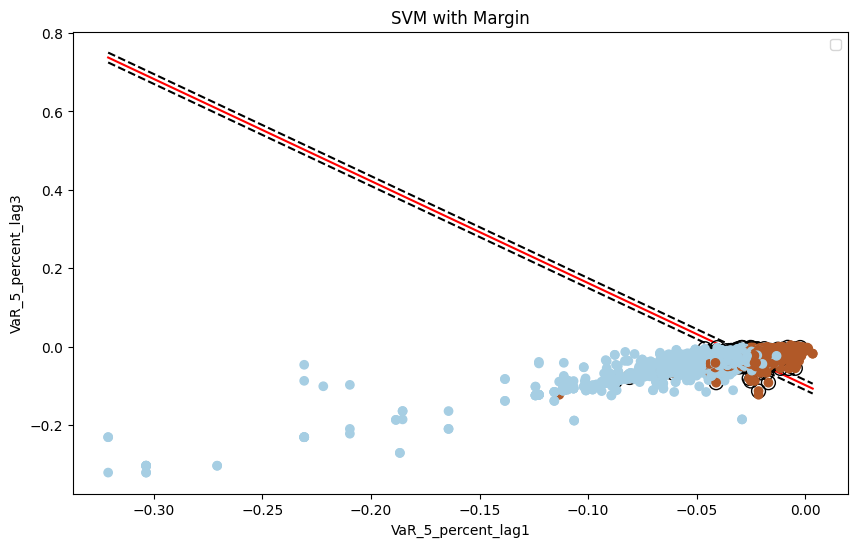

In [58]:
plt.figure(figsize=(10, 6))
plt.clf()
plt.plot(xx, yy, 'r-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none',edgecolors='k', zorder=5)
#cmap is the color map
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=5, cmap=plt.cm.Paired)
plt.legend()
plt.title('SVM with Margin')
plt.axis('tight')
plt.xlabel('VaR_5_percent_lag1')
plt.ylabel('VaR_5_percent_lag3')
plt.show()


In [59]:
clf_rbf = SVC(C=10, kernel='rbf', gamma='scale')  
clf_rbf.fit(x_train_2D, y_train_2D)

SVC(C=10)

In [60]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))


In [61]:
Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

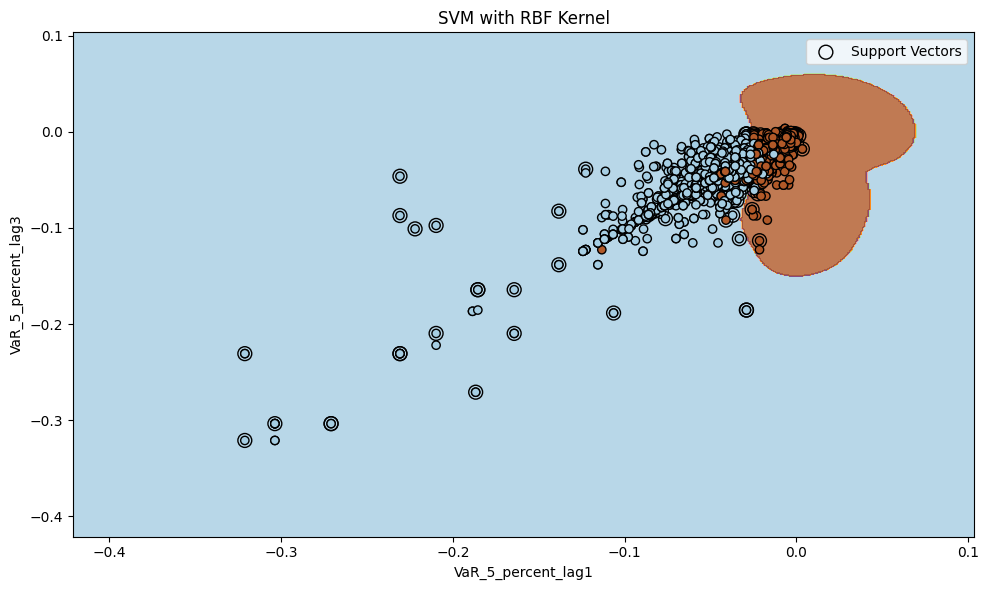

In [62]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', zorder=10)  
plt.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with RBF Kernel')
plt.xlabel('VaR_5_percent_lag1')
plt.ylabel('VaR_5_percent_lag3')
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [66]:
MyDataSet=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\oil_prediction_final.csv')
MyDataSet.head()

,Unnamed: 0,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return
0,0,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42,-0.007825
1,1,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11,-0.036917
2,2,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45,0.005647
3,3,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47,0.000000
4,4,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60,-0.003238


In [67]:
MyDataSet=MyDataSet.drop(['Unnamed: 0'],axis=1)

In [68]:
confidence_level = 0.05
MyDataSet['VaR_5_percent'] = MyDataSet['oil_return'].rolling(window=10).quantile(confidence_level)

In [69]:
MyDataSet['VaR_5_percent_lag1'] = MyDataSet['VaR_5_percent'].shift(1)
MyDataSet['VaR_5_percent_lag2'] = MyDataSet['VaR_5_percent'].shift(2)
MyDataSet['VaR_5_percent_lag3'] = MyDataSet['VaR_5_percent'].shift(3)

In [70]:
MyDataSet.dropna(inplace=True)

In [73]:
X= MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent'], axis= 1)
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [74]:
Y=MyDataSet['VaR_5_percent']

In [75]:
threshold=np.median(Y)

In [76]:
Y_binary = (Y> threshold).astype(int)

In [77]:
print(X.shape)
print(Y.shape)

(6001, 7)
(6001,)


In [78]:
x_train,x_test,y_train,y_test = train_test_split(X,Y_binary,test_size =0.3, random_state=42)
print(x_train.shape)
print(y_train.shape)

(4200, 7)
(4200,)


In [79]:
gbdt_classifier = GradientBoostingClassifier(
    n_estimators=100,    
    learning_rate=0.1,  
    max_depth=4,         
    min_samples_split=2, 
    random_state=42     
)

In [80]:
gbdt_classifier.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [81]:
y_pred = gbdt_classifier.predict(x_test)

In [82]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9300

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       917
           1       0.93      0.93      0.93       884

    accuracy                           0.93      1801
   macro avg       0.93      0.93      0.93      1801
weighted avg       0.93      0.93      0.93      1801



In [83]:
matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(matrix)


The confusion matrix is:
[[857  60]
 [ 66 818]]


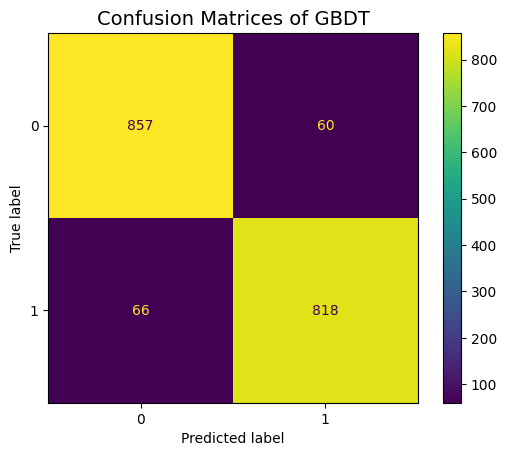

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrices of GBDT', fontsize=14)
plt.show()

In [85]:
FeatureImpR=gbdt_classifier.feature_importances_   
indicesR = np.argsort(FeatureImpR)[::-1]
indicesR
feature_namesR = MyDataSet.drop(['oil_return','date','value','spindx','GPRD','VaR_5_percent'], axis=1).columns
print("Feature importances:")
for f in range(len(feature_namesR)):
    print(f"{f + 1}. feature: {feature_namesR[indicesR[f]]} ({FeatureImpR[indicesR[f]]:.4f})")

Feature importances:
1. feature: VaR_5_percent_lag1 (0.9064)
2. feature: sprtrn (0.0199)
3. feature: GPRD_ACT (0.0193)
4. feature: daily_policy_index (0.0191)
5. feature: GPRD_THREAT (0.0140)
6. feature: VaR_5_percent_lag3 (0.0122)
7. feature: VaR_5_percent_lag2 (0.0091)


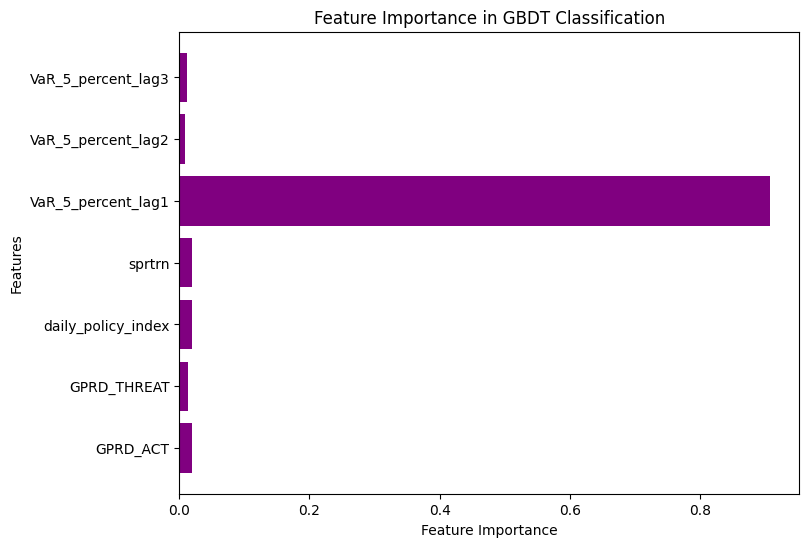

In [87]:
plt.figure(figsize=(8, 6))
plt.barh(feature_namesR, FeatureImpR, color='purple')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in GBDT Classification")
plt.show()